In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy.stats import norm
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import shapiro
from scipy.stats import kstest
from statsmodels.tsa.seasonal import STL

In [13]:
df=pd.read_csv('KarawngMei.csv',sep=';', decimal=',', index_col='DATE', parse_dates=True, dayfirst=True)
pd.set_option('display.float_format', '{:,.2f}'.format)
print(df.shape)
df.head()

(30, 1)


,VOLUME
DATE,
2023-04-01,"589,855,910,429.37"
2023-04-02,"1,393,839,616,405.13"
2023-04-03,"674,140,480,179.59"
2023-04-04,"1,136,429,499,717.85"
2023-04-05,"1,112,962,691,679.53"


<Axes: xlabel='DATE'>

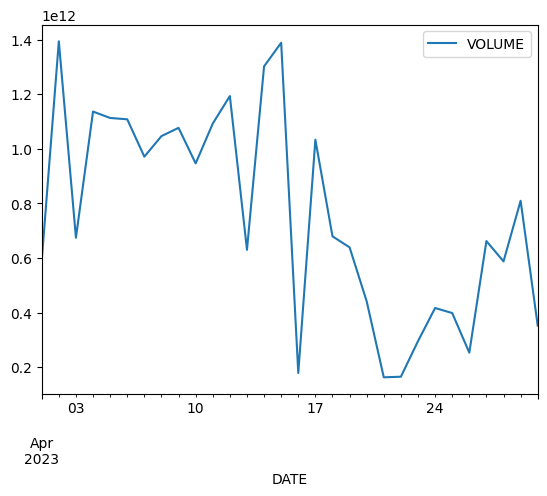

In [24]:
df.plot(y='VOLUME')

**Detecting Sesonality and Trend**

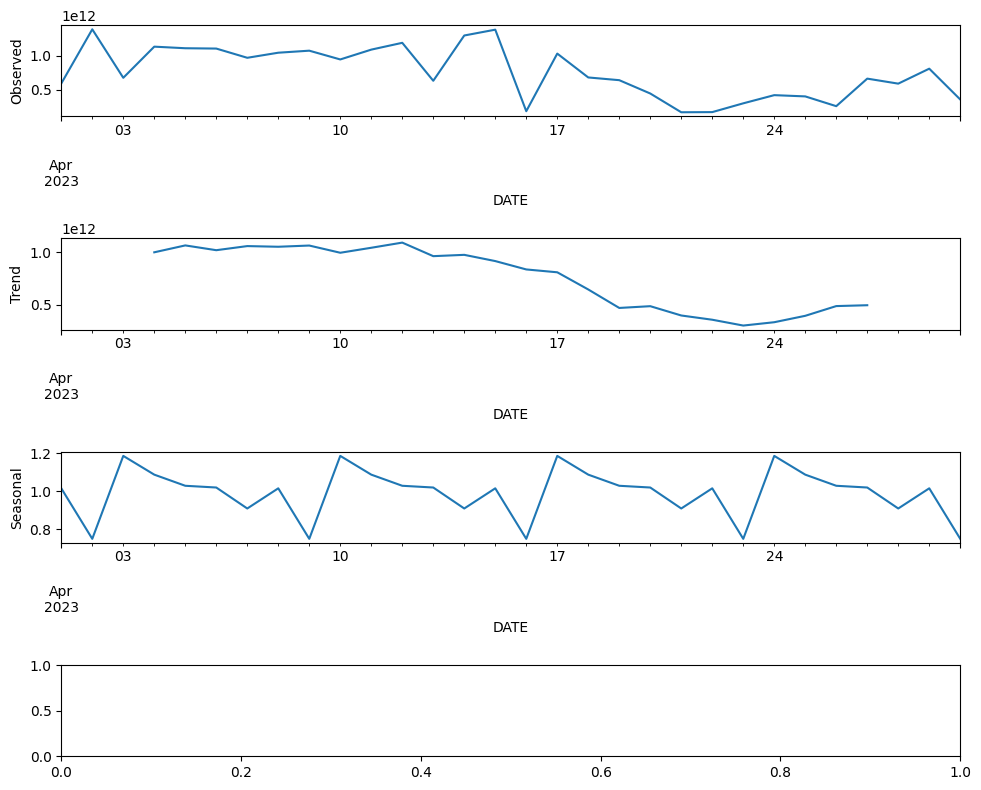

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['VOLUME'], model='multiplicative')  # Use 'multiplicative' for non linear trend

# Plot the decomposition components
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
result.observed.plot(ax=axes[0])
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')


plt.tight_layout()
plt.show()

### Normality Test Shapiro-Wilk

Test Statistic: 0.9419540762901306
p-value: 0.10268261283636093
Data follows a normal distribution (fail to reject null hypothesis)


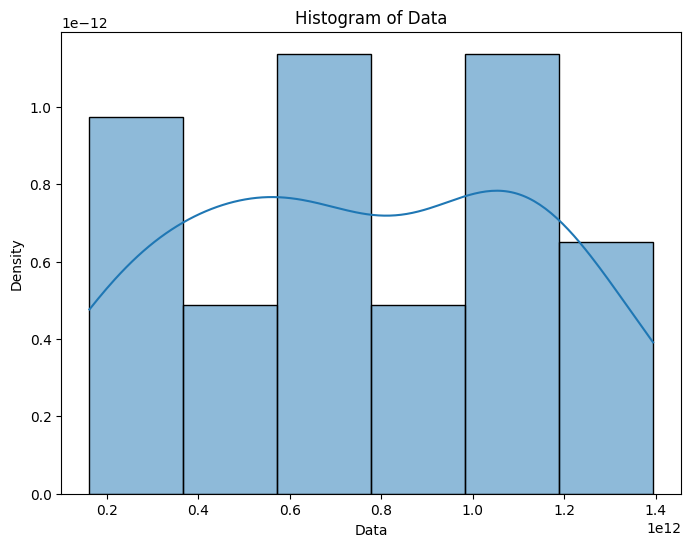

In [27]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['VOLUME'], kde=True, stat='density')
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Histogram of Data')

# Perform the Shapiro-Wilk normality test on the data
statistic, p_value = shapiro(df['VOLUME'])

# Set the significance level (alpha)
alpha = 0.05

# Print the test statistic and p-value
print("Test Statistic:", statistic)
print("p-value:", p_value)

# Compare the p-value with the significance level
if p_value > alpha:
    print("Data follows a normal distribution (fail to reject null hypothesis)")
else:
    print("Data does not follow a normal distribution (reject null hypothesis)")

In [25]:
# Apply Box-Cox transformation to the time series data
transformed_data, lambda_ = boxcox(df['VOLUME'])

# Create a new DataFrame with the transformed data
transformed_df = pd.DataFrame({'Transformed_Value': transformed_data}, index=df.index)

# Concatenate the original and transformed dataframes
result_df = pd.concat([df, transformed_df], axis=1)

# Print the combined DataFrame
result_df.head()

,VOLUME,Transformed_Value
DATE,,
2023-04-01,"589,855,910,429.37","554,417,100.49"
2023-04-02,"1,393,839,616,405.13","1,039,806,338.67"
2023-04-03,"674,140,480,179.59","611,301,149.43"
2023-04-04,"1,136,429,499,717.85","895,587,409.94"
2023-04-05,"1,112,962,691,679.53","882,025,273.12"


Text(0.5, 1.0, 'Histogram of Data')

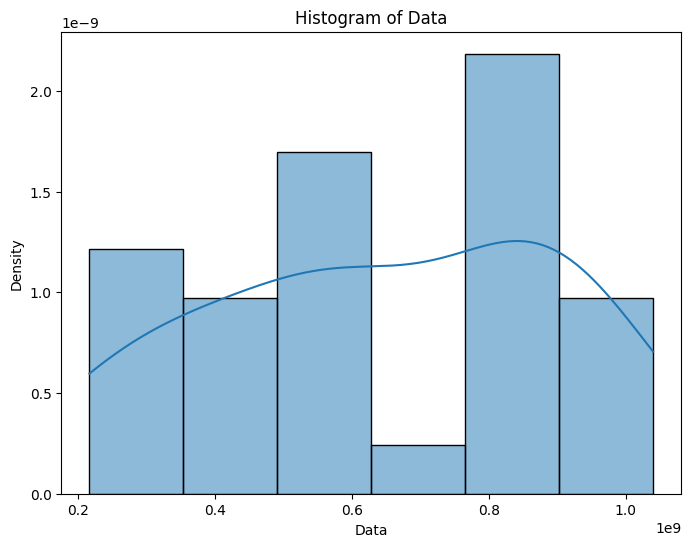

In [29]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(result_df['Transformed_Value'], kde=True, stat='density')
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Histogram of Data')

### ACF & PACF

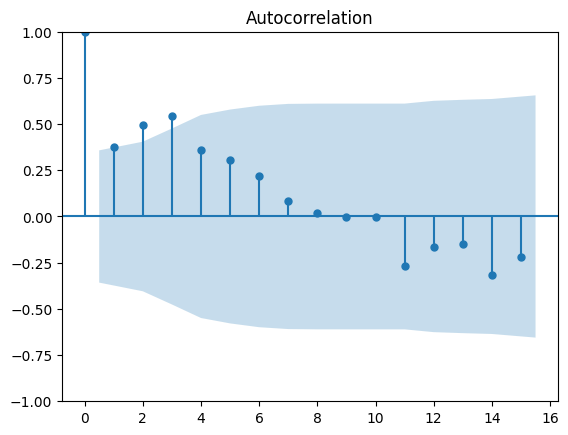

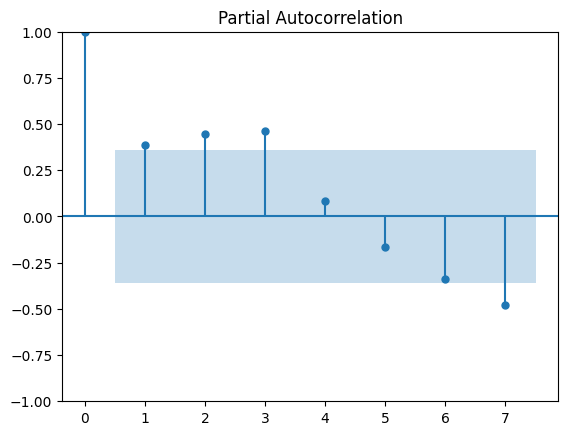

In [84]:
from statsmodels.graphics import tsaplots
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt


#plot autocorrelation function
fig = tsaplots.plot_acf(df)
plt.show()

#plot partial autocorrelation function (FIX THE LAGS)
fig = tsaplots.plot_pacf(df['VOLUME'], lags=7)
plt.show()

In [72]:
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    dftest = adfuller(df, autolag = 'AIC')
    print("1. ADF: ", dftest[0])
    print("2. P-Value : ", dftest[2])
    print("3. Num Of Lags :", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",dftest[3])
    print("5. Critcal Values : ")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
adf_test(df)

1. ADF:  -0.9641451853040517
2. P-Value :  2
3. Num Of Lags : 2
4. Num Of Observations Used For ADF Regression: 27
5. Critcal Values : 
	 1% :  -3.6996079738860943
	 5% :  -2.9764303469999494
	 10% :  -2.627601001371742


In [75]:
df['DIFFERENCE'] = df['VOLUME'].diff()
df = df.dropna()
print(df)

                  VOLUME    DIFFERENCE
DATE                                  
2023-04-02  1.393840e+12  8.039837e+11
2023-04-03  6.741405e+11 -7.196991e+11
2023-04-04  1.136429e+12  4.622890e+11
2023-04-05  1.112963e+12 -2.346681e+10
2023-04-06  1.108114e+12 -4.849054e+09
2023-04-07  9.712096e+11 -1.369040e+11
2023-04-08  1.046534e+12  7.532473e+10
2023-04-09  1.076719e+12  3.018461e+10
2023-04-10  9.465019e+11 -1.302171e+11
2023-04-11  1.092377e+12  1.458747e+11
2023-04-12  1.193357e+12  1.009800e+11
2023-04-13  6.298570e+11 -5.634996e+11
2023-04-14  1.302088e+12  6.722308e+11
2023-04-15  1.388624e+12  8.653608e+10
2023-04-16  1.783311e+11 -1.210293e+12
2023-04-17  1.033457e+12  8.551259e+11
2023-04-18  6.792925e+11 -3.541644e+11
2023-04-19  6.388728e+11 -4.041970e+10
2023-04-20  4.410899e+11 -1.977829e+11
2023-04-21  1.626229e+11 -2.784670e+11
2023-04-22  1.648730e+11  2.250140e+09
2023-04-23  2.952383e+11  1.303653e+11
2023-04-24  4.166581e+11  1.214198e+11
2023-04-25  3.981080e+11 

In [76]:
df_dif = pd.DataFrame(df)
df = df.drop('VOLUME', axis=1)
df = df.rename(columns={'DIFFERENCE': 'VOLUME'})
df

,VOLUME
DATE,
2023-04-02,8.039837e+11
2023-04-03,-7.196991e+11
2023-04-04,4.622890e+11
2023-04-05,-2.346681e+10
2023-04-06,-4.849054e+09
2023-04-07,-1.369040e+11
2023-04-08,7.532473e+10
2023-04-09,3.018461e+10
2023-04-10,-1.302171e+11


In [77]:
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    dftest = adfuller(df, autolag = 'AIC')
    print("1. ADF: ", dftest[0])
    print("2. P-Value : ", dftest[2])
    print("3. Num Of Lags :", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",dftest[3])
    print("5. Critcal Values : ")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
adf_test(df)

1. ADF:  -7.217737014291421
2. P-Value :  1
3. Num Of Lags : 1
4. Num Of Observations Used For ADF Regression: 27
5. Critcal Values : 
	 1% :  -3.6996079738860943
	 5% :  -2.9764303469999494
	 10% :  -2.627601001371742


## **ARIMA**

In [ ]:
#membuat test dataset
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

In [47]:
from pmdarima import auto_arima
arima = auto_arima(df, start_p=0, start_q=0,
                           seasonal=False, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

arima.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1638.787, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1636.148, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1635.480, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1636.814, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1636.076, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1630.837, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1632.123, Time=0.53 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1628.432, Time=0.54 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1629.178, Time=0.71 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1626.309, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1626.929, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1626.964, Time=0.42 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(0, 1, 3)   Log Likelihood                -809.154
Date:                Tue, 27 Jun 2023   AIC                           1626.309
Time:                        00:06:10   BIC                           1631.778
Sample:                    04-01-2023   HQIC                          1628.022
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7294      0.292     -2.502      0.012      -1.301      -0.158
ma.L2          0.3749      0.380      0.986      0.324      -0.370       1.120
ma.L3          0.4572      0.212      2.154      0.031       0.041       0.873
sigma2      1.008e+23        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                 3.11
Prob(Q):                              0.34   Prob(JB):                         0.21
Heteroskedasticity (H):               0.59   Skew:                             0.23
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.53e+62. Standard errors may be unstable.
"""

In [ ]:
print(df.shape)
train_sarima=df.iloc[:-30]
test_sarima=df.iloc[-30:]
print(train_sarima.shape,test_sarima.shape)

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

pred_arima=pd.DataFrame(pred)
pred_arima=pd.concat([df,pred],axis=1)
pred_arima

## **SARIMA**

In [134]:
from pmdarima import auto_arima
sarima = auto_arima(df, start_p=0,start_q=2,max_p=5,max_q=5,m=7,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sarima.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=1633.699, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1638.787, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1637.731, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1636.806, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1636.814, Time=0.04 sec
 ARIMA(0,1,2)(0,0,1)[7] intercept   : AIC=1631.918, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=1630.837, Time=0.25 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=1631.741, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1635.480, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=1632.123, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[7] intercept   : AIC=1628.432, Time=0.23 sec
 ARIMA(0,1,3)(1,0,0)[7] intercept   : AIC=1630.213, Time=0.56 sec
 ARIMA(0,1,3)(0,0,1)[7] intercept   : AIC=1630.012, Time=0.51 sec
 ARIMA(0,1,3)(1,0,1)[7] intercept   : AIC=1631.579, Time=0.65 sec
 ARIMA(1,1,3)(0,0,0)[7] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(0, 1, 3)   Log Likelihood                -809.154
Date:                Mon, 26 Jun 2023   AIC                           1626.309
Time:                        03:09:41   BIC                           1631.778
Sample:                    04-01-2023   HQIC                          1628.022
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7294      0.292     -2.502      0.012      -1.301      -0.158
ma.L2          0.3749      0.380      0.986      0.324      -0.370       1.120
ma.L3          0.4572      0.212      2.154      0.031       0.041       0.873
sigma2      1.008e+23        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                 3.11
Prob(Q):                              0.34   Prob(JB):                         0.21
Heteroskedasticity (H):               0.59   Skew:                             0.23
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.53e+62. Standard errors may be unstable.
"""

In [138]:
import statsmodels.api as sm


# Define the ARIMA model with the appropriate p, d, and q values
model = sm.tsa.ARIMA(df['VOLUME'], order=(1, 1, 4))

# Fit the ARIMA model using maximum likelihood estimation
results = model.fit()

# Obtain the parameter estimates
parameter_estimates = results.params

c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
